# Training "intermediate" approach

## Preparation

In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
project_path = Path().resolve().parent
input_path = project_path / "results" / "intermediate" / "training" / "intermediate"
#output_path = project_path / "results" / "MGE_files"

## Joined performance

In [17]:
thresholds=pd.read_csv(project_path / "results" / "intermediate" / "training" / "intermediate_thresholds.txt", header=None)
thresholds

,0
0,0.2 10 4 3
1,0.2 10 4 4
2,0.2 10 4 5
3,0.2 10 5 3
4,0.2 10 5 4
...,...
76,0.4 30 5 4
77,0.4 30 5 5
78,0.4 30 6 3
79,0.4 30 6 4


In [71]:
performance=pd.DataFrame(columns=['genome', 'score_threshold', 'n_threshold', 'initial_n_threshold', 'distance_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'])
#performance = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python")
for i in thresholds[0]:
    perf = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python", names=['genome', 'score_threshold', 'n_threshold', 'initial_n_threshold', 'distance_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'], header=None)
    performance=pd.concat([performance, perf])
performance['dispersion_weighted']=(performance.nr_toolscheme)*(pd.to_numeric(performance.avge_dispersion, errors='coerce'))
performance[0:50]

,genome,score_threshold,n_threshold,initial_n_threshold,distance_threshold,nr_tool,nr_toolscheme,nr_scheme,avge_dispersion,coverage_denominator,coverage_numerator,dispersion_weighted
0,GCA_000820965.2,0.2,10,4,3,2,2,9,1.0,38,35,2.0
1,GCA_000963335.1,0.2,10,4,3,3,1,14,1.0,20,16,1.0
2,GCA_002860885.1,0.2,10,4,3,5,2,11,1.0,16,13,2.0
3,GCA_001682765.1,0.2,10,4,3,3,2,6,1.0,81,73,2.0
4,GCA_002289685.1,0.2,10,4,3,8,6,13,1.0,129,121,6.0
5,GCA_000339695.1,0.2,10,4,3,1,0,3,NaN,0,0,NaN
6,GCA_001714745.1,0.2,10,4,3,4,4,15,1.0,137,92,4.0
7,GCA_002907325.1,0.2,10,4,3,1,0,4,NaN,0,0,NaN
8,GCA_001588875.1,0.2,10,4,3,3,1,14,1.0,30,19,1.0
9,GCA_000758365.1,0.2,10,4,3,11,6,21,1.3333333333333333,129,91,8.0


In [72]:
measures=performance.groupby(by=['score_threshold', 'n_threshold', 'initial_n_threshold', 'distance_threshold'], axis=0).sum()
measures=measures.loc[:, ['nr_tool', 'nr_toolscheme', 'nr_scheme', 'coverage_denominator', 'dispersion_weighted', 'coverage_numerator']]

In [73]:
measures['precision']=measures.nr_toolscheme/measures.nr_scheme
measures['recall']=measures.nr_toolscheme/measures.nr_tool
measures['coverage']=measures.coverage_numerator/measures.coverage_denominator
measures['dispersion']=measures.dispersion_weighted/measures.nr_toolscheme
measures['F-score']=2*measures.precision*measures.recall/(measures.precision+measures.recall)
m = measures.loc[:,['precision', 'recall', 'F-score']]
m[48:]

precision  \
score_threshold n_threshold initial_n_threshold distance_threshold              
0.3             30          5                   3                    0.700000   
                                                4                    0.673684   
                                                5                    0.650485   
                            6                   3                    0.722892   
                                                4                    0.689655   
                                                5                    0.663158   
0.4             10          4                   3                    0.304668   
                                                4                    0.301435   
                                                5                    0.295349   
                            5                   3                    0.331522   
                                                4                    0.327957   
                                                5                    0.331536   
                            6                   3                    0.347701   
                                                4                    0.345714   
                                                5                    0.348703   
                20          4                   3                    0.546584   
                                                4                    0.526012   
                                                5                    0.510989   
                            5                   3                    0.573333   
                                                4                    0.550000   
                                                5                    0.542169   
                            6                   3                    0.566434   
                                                4                    0.557047   
                                                5                    0.548387   
                30          4                   3                    0.722892   
                                                4                    0.720930   
                                                5                    0.680851   
                            5                   3                    0.756410   
                                                4                    0.746835   
                                                5                    0.714286   
                            6                   3                    0.820896   
                                                4                    0.797101   
                                                5                    0.777778   

                                                                      recall  \
score_threshold n_threshold initial_n_threshold distance_threshold             
0.3             30          5                   3                   0.304348   
                                                4                   0.309179   
                                                5                   0.323671   
                            6                   3                   0.289855   
                                                4                   0.289855   
                                                5                   0.304348   
0.4             10          4                   3                   0.599034   
                                                4                   0.608696   
                                                5                   0.613527   
                            5                   3                   0.589372   
                                                4                   0.589372   
                                                5                   0.594203   
                            6                   3                   0.584541   
                                

In [74]:
m.sort_values(['distance_threshold', 'initial_n_threshold', 'n_threshold', 'score_threshold' ])

precision  \
score_threshold n_threshold initial_n_threshold distance_threshold              
0.2             10          4                   3                    0.185695   
0.3             10          4                   3                    0.233096   
0.4             10          4                   3                    0.304668   
0.2             20          4                   3                    0.380228   
0.3             20          4                   3                    0.458128   
...                                                                       ...   
                            6                   5                    0.481675   
0.4             20          6                   5                    0.548387   
0.2             30          6                   5                    0.562500   
0.3             30          6                   5                    0.663158   
0.4             30          6                   5                    0.777778   

                                                                      recall  \
score_threshold n_threshold initial_n_threshold distance_threshold             
0.2             10          4                   3                   0.652174   
0.3             10          4                   3                   0.632850   
0.4             10          4                   3                   0.599034   
0.2             20          4                   3                   0.483092   
0.3             20          4                   3                   0.449275   
...                                                                      ...   
                            6                   5                   0.444444   
0.4             20          6                   5                   0.410628   
0.2             30          6                   5                   0.347826   
0.3             30          6                   5                   0.304348   
0.4             30          6                   5                   0.270531   

                                                                     F-score  
score_threshold n_threshold initial_n_threshold distance_threshold            
0.2             10          4                   3                   0.289079  
0.3             10          4                   3                   0.340702  
0.4             10          4                   3                   0.403909  
0.2             20          4                   3                   0.425532  
0.3             20          4                   3                   0.453659  
...                                                                      ...  
                            6                   5                   0.462312  
0.4             20          6                   5                   0.469613  
0.2             30          6                   5                   0.429851  
0.3             30          6                   5                   0.417219  
0.4             30          6                   5                   0.401434  

[81 rows x 3 columns]

In [75]:
m.sort_values(['initial_n_threshold','distance_threshold',  'score_threshold', 'n_threshold' ])[0:40]


precision  \
score_threshold n_threshold initial_n_threshold distance_threshold              
0.2             10          4                   3                    0.185695   
                20          4                   3                    0.380228   
                30          4                   3                    0.557252   
0.3             10          4                   3                    0.233096   
                20          4                   3                    0.458128   
                30          4                   3                    0.680412   
0.4             10          4                   3                    0.304668   
                20          4                   3                    0.546584   
                30          4                   3                    0.722892   
0.2             10          4                   4                    0.177398   
                20          4                   4                    0.347973   
                30          4                   4                    0.500000   
0.3             10          4                   4                    0.228223   
                20          4                   4                    0.440909   
                30          4                   4                    0.653846   
0.4             10          4                   4                    0.301435   
                20          4                   4                    0.526012   
                30          4                   4                    0.720930   
0.2             10          4                   5                    0.173522   
                20          4                   5                    0.324074   
                30          4                   5                    0.472727   
0.3             10          4                   5                    0.222034   
                20          4                   5                    0.428571   
                30          4                   5                    0.598291   
0.4             10          4                   5                    0.295349   
                20          4                   5                    0.510989   
                30          4                   5                    0.680851   
0.2             10          5                   3                    0.208398   
                20          5                   3                    0.414226   
                30          5                   3                    0.581967   
0.3             10          5                   3                    0.254980   
                20          5                   3                    0.478723   
                30          5                   3                    0.700000   
0.4             10          5                   3                    0.331522   
                20          5                   3                    0.573333   
                30          5                   3                    0.756410   
0.2             10          5                   4                    0.206154   
                20          5                   4                    0.389313   
                30          5                   4                    0.541353   
0.3             10          5                   4                    0.254473   

                                                                      recall  \
score_threshold n_threshold initial_n_threshold distance_threshold             
0.2             10          4                   3                   0.652174   
                20          4                   3                   0.483092   
                30          4                   3                   0.352657   
0.3             10          4                   3                   0.632850   
                20          4                   3                   0.449275   
                30          4                   3                   0.318841   
0.4             10       

In [76]:
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


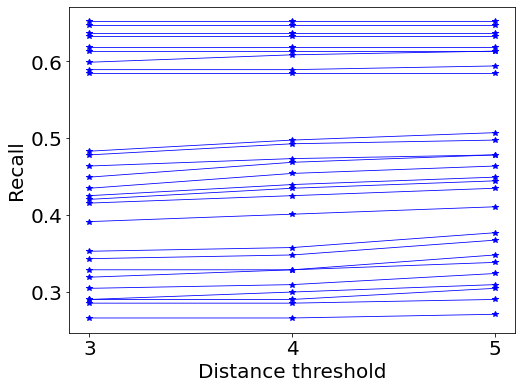

In [77]:
m=m.sort_values(['initial_n_threshold',  'score_threshold', 'n_threshold', 'distance_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([3, 4, 5],m.iloc[i:i+3,-2], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Distance threshold")
ax.set_xticks([3, 4, 5])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_recall_dist.png", bbox_inches='tight')


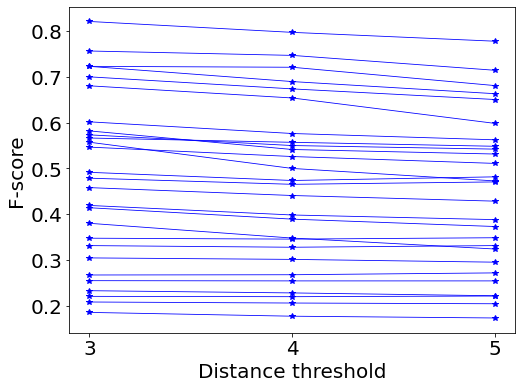

In [78]:
fig, ax = plt.subplots(figsize=[8,6])
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([3, 4, 5],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Distance threshold")
ax.set_xticks([3, 4, 5])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_precision_dist.png", bbox_inches='tight')


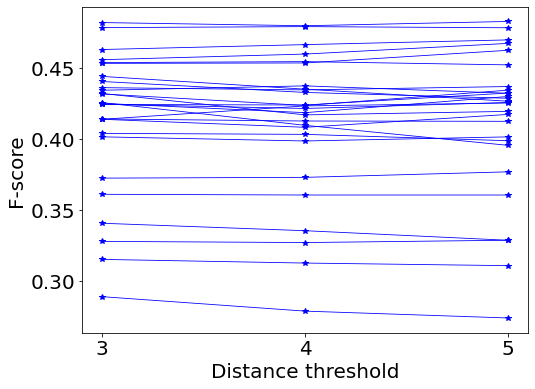

In [79]:
fig, ax = plt.subplots(figsize=[8,6])
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([3, 4, 5],m.iloc[i:i+3,-1], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Distance threshold")
ax.set_xticks([3, 4, 5])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_F_dist.png", bbox_inches='tight')


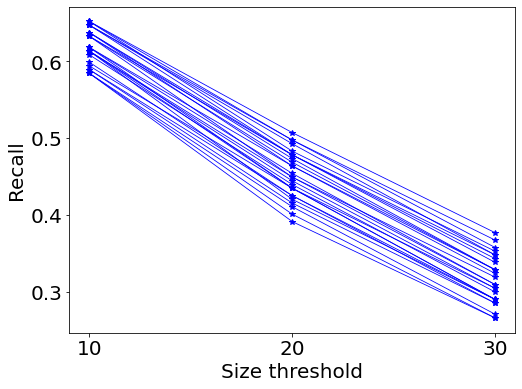

In [80]:
m=m.sort_values(['initial_n_threshold','distance_threshold',  'score_threshold', 'n_threshold' ])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-2], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_recall_size.png", bbox_inches='tight')


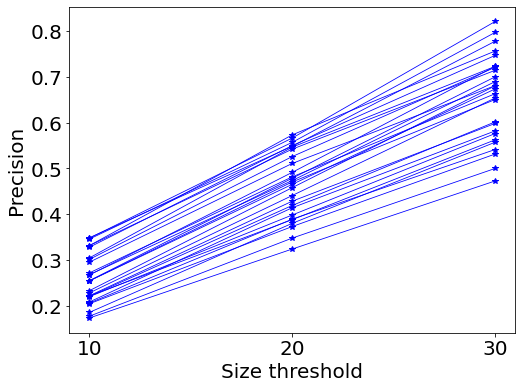

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
ax.set_ylabel("Precision")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_precision_size.png", bbox_inches='tight')


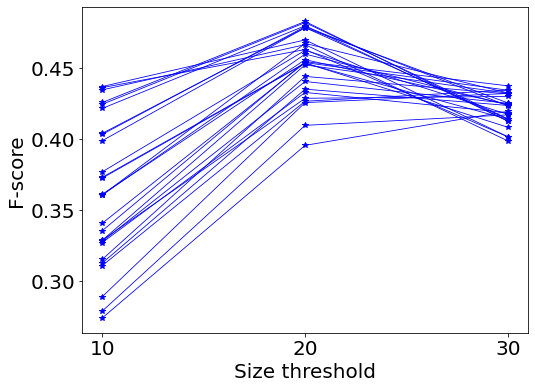

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-1], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_F_size.png", bbox_inches='tight')


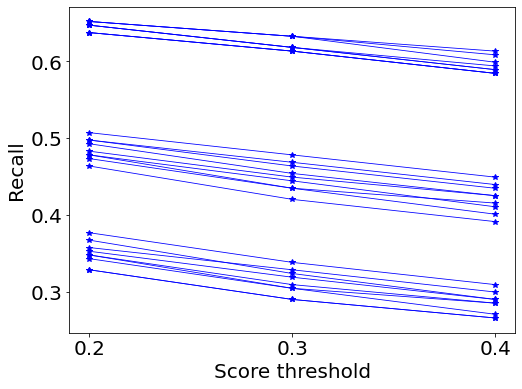

In [83]:
m=m.sort_values(['distance_threshold', 'initial_n_threshold', 'n_threshold', 'score_threshold' ])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-2], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_recall_score.png", bbox_inches='tight')


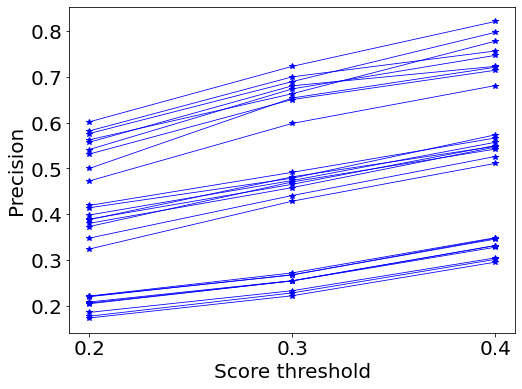

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("Precision")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_precision_score.png", bbox_inches='tight')


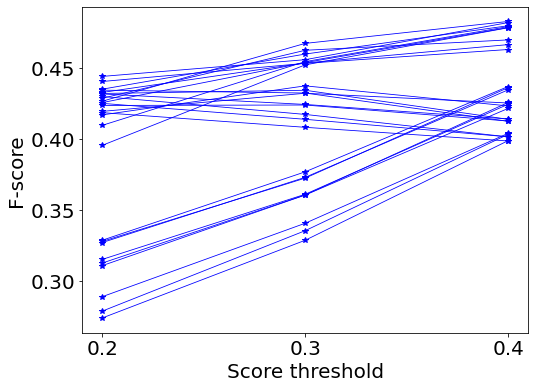

In [85]:
m=m.sort_values(['distance_threshold', 'initial_n_threshold', 'n_threshold', 'score_threshold' ])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-1], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_F_score.png", bbox_inches='tight')


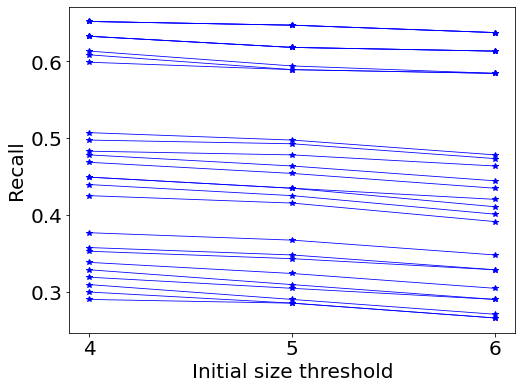

In [86]:
m=m.sort_values(['distance_threshold', 'n_threshold', 'score_threshold', 'initial_n_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([4, 5, 6],m.iloc[i:i+3,-2], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Initial size threshold")
ax.set_xticks([4, 5, 6])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_recall_insize.png", bbox_inches='tight')


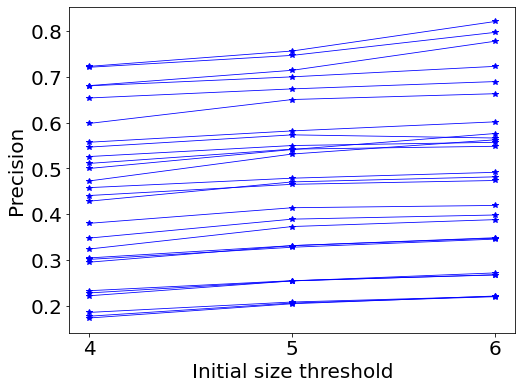

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([4, 5, 6],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Initial size threshold")
ax.set_xticks([4, 5, 6])
ax.set_ylabel("Precision")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_precision_insize.png", bbox_inches='tight')


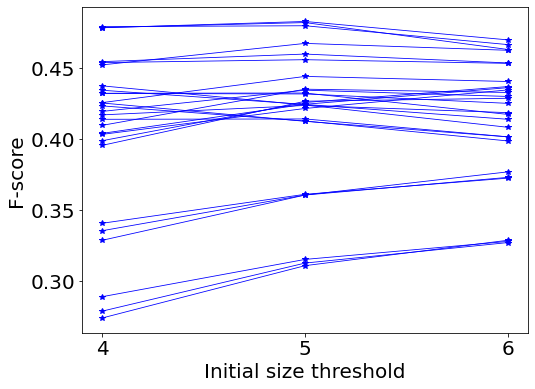

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([4, 5, 6],m.iloc[i:i+3,-1], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Initial size threshold")
ax.set_xticks([4, 5, 6])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_intermediate_F_insize.png", bbox_inches='tight')
